In [1]:
import warnings
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

import ipywidgets
from ipywidgets import interact
import IPython
# If in your browser the figures are not nicely vizualized, change the following line.
rcParams['font.size'] = 12

warnings.filterwarnings('ignore')

layout = ipywidgets.Layout(width='auto', height='40px')
rcParams['figure.figsize'] = (20, 12)
rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 4
rcParams['lines.markersize'] = 20

### Topics: MLE, MAP and Bias-Variance tradeoff

Let's observe such a problem. We have a website, and we want to know the distribution of the number of visitors at some specific hour (say, from 19:00 to 20:00) using the number of visitors for $m$ days: $Z = (z_1, \ldots z_m)$. We decide to neglect any seasonal effects (as well as holidays), and we assume that within those $m$ days the website didn't attract a large new audience. In other words, we assume that all $z_i$ are i.i.d.. 

P.S. Knowing the distribution will help us to understand the peak load at least within "normal" days. For example, we can find a minimum $k$, such that $P(Z > k) <= 0.001$, i.e., we can find the lower bound for our resoursces, that will be enough in 99.9% days.

$\textbf{Q}$: Which parametrized distribution do you find suitable for this problem?

$Pois(\lambda)$ is the distribution of the number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and $\textbf{independently of the time since the last event}$. 

$$ P(z|\lambda) = \exp(-\lambda)\frac{\lambda^z}{z!} $$

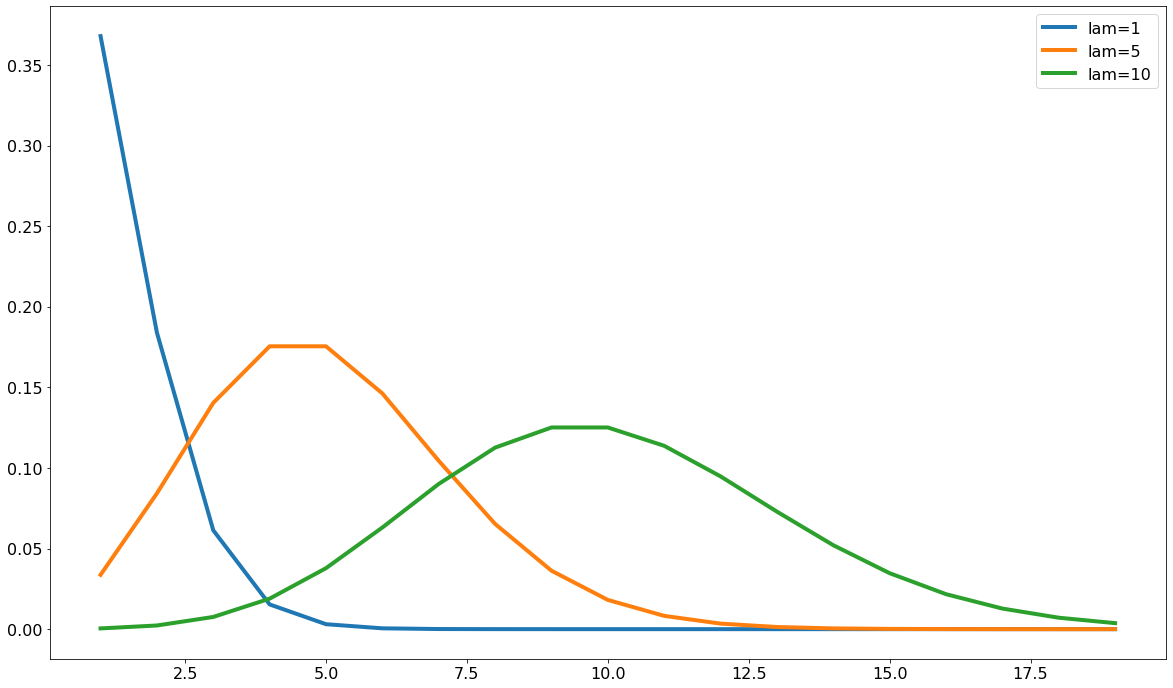

In [2]:
import scipy.stats as stats
X = range(1, 20)

plt.plot(X, stats.poisson.pmf(X, 1), label='lam=1')
plt.plot(X, stats.poisson.pmf(X, 5), label='lam=5')
plt.plot(X, stats.poisson.pmf(X, 10), label='lam=10')
plt.legend()
plt.show()

$\textbf{Q}$: Why don't we just use normal distribution since it's very nice and has so many good properties?

### Likelihood: 

Since we use i.i.d. assumption:

$P(Z|\lambda) = \prod_{i = 1}^m P(z_i|\lambda) = \prod_{i = 1}^m\exp(-\lambda)\frac{\lambda^{z_i}}{z_i!}$

We want to maximize likelihood: find parameter $\lambda$ which will maximize the probability of our data. 

$\textbf{Q}$: How can we find an argument that maximizes such a function? 

$\textbf{Q}$: We really don't want to take a derivative of this function. Can we simplify it?

$argmax_{\lambda \in \mathbb{R}} P(Z|\lambda) = argmax_{\lambda \in \mathbb{R}} \log(P(Z|\lambda))$

### Log-likelihood:

$\log(P(Z|\lambda)) = \sum_{i = 1}^m\log(\exp(-\lambda)\frac{\lambda^{z_i}}{z_i!}) = \sum_{i = 1}^m -\lambda + \log(\lambda^{z_i}) - \log(z_i!) = \sum_{i = 1}^m -\lambda + z_i\log \lambda - \log(z_i!)$

$\frac{\partial}{\partial \lambda} \log(P(Z|\lambda)) = \sum_{i = 1}^m -1 + z_i\frac{1}{\lambda} = -m + \frac{1}{\lambda}\sum_{i = 1}^m z_i$

$-m + \frac{1}{\lambda}\sum_{i = 1}^m z_i = 0 \Rightarrow \lambda = \frac{1}{m}\sum_{i = 1}^m z_i$

$\textbf{Side note}$: this result should not be surprising. $\lambda$ is a parameter "how many events appear within time period $\textbf{on average}$"

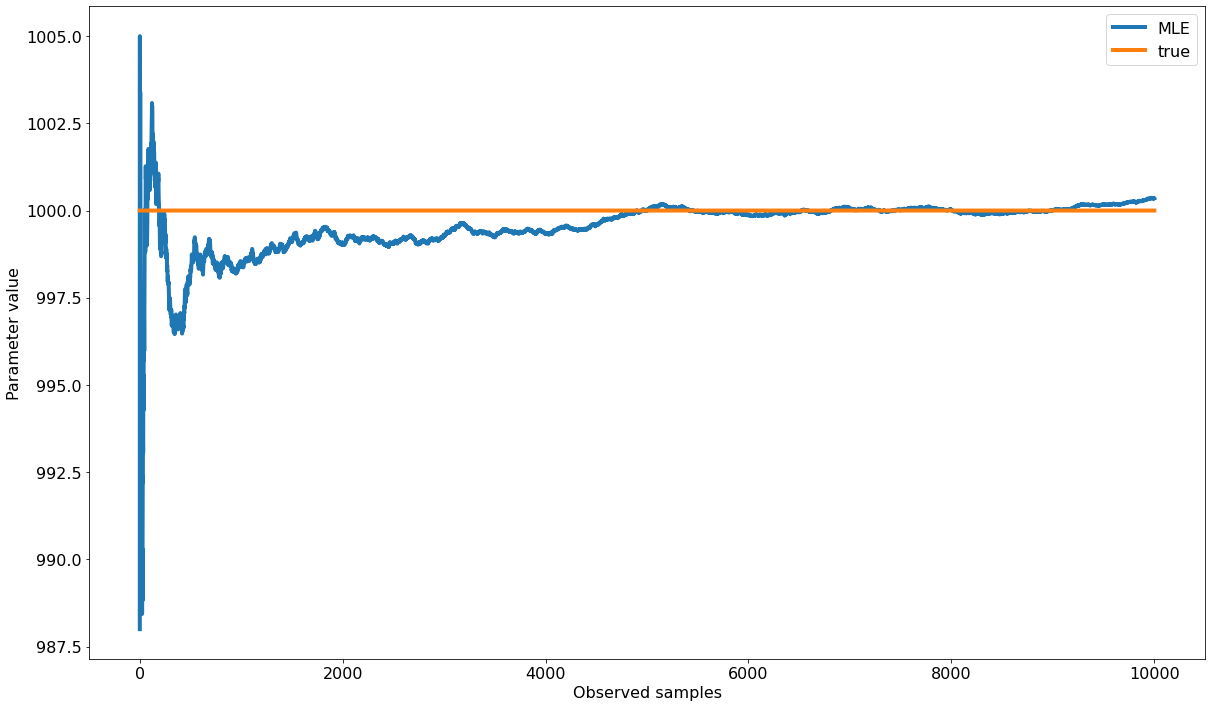

In [13]:
np.random.seed(42)
n_samples = 10000
true_lambda = 1000

Z = np.random.poisson(lam = true_lambda, size=n_samples)

X = range(1, n_samples + 1)
mle_lambda = [np.mean(Z[:k]) for k in X]

plt.plot(X, mle_lambda, label='MLE')
plt.plot(X, np.ones(len(X)) * true_lambda, label='true')
plt.xlabel('Observed samples')
plt.ylabel('Parameter value')
plt.legend()
plt.show()

### Unbiased estimators

Let's consider the same problem of inference the parameter of Poisson distributed data. Before we received an unbiased MLE. Intuitively, "unbiased" means: when we will have infinitely many samples, we will get the true parameter. More formally, if our estimator of the true parameter $\lambda$ is $\hat{\lambda}$, then:
$$ E_{z|\lambda}[\hat{\lambda}] =  \int_{z}\hat{\lambda}P(z|\lambda) = \lambda$$

Note: In our case $P(z|\lambda)$ is only defined when $z \in \mathbb{N}$. One can easily check that MLE we found before is unbiased (using linearity of expectation). 

In fact, it's not that difficult to find an unbiased estimator. For example, $z_m$ is an unbiased estimator of $\lambda$. Then there should be something else!

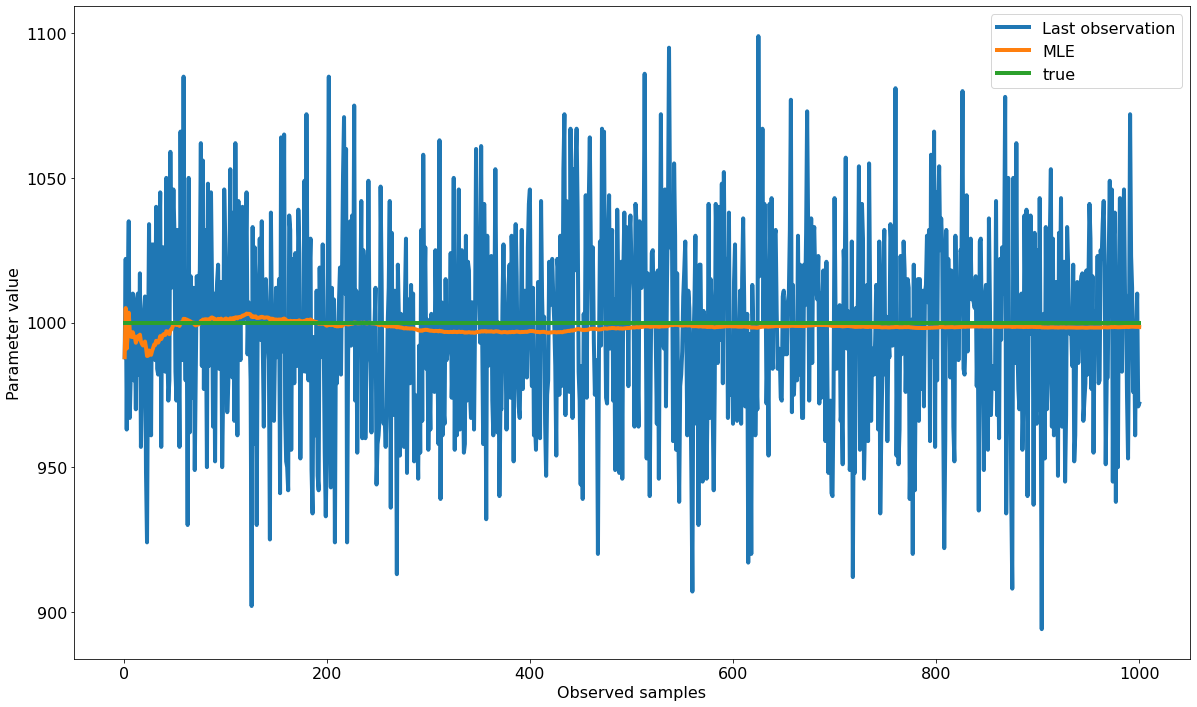

In [4]:
np.random.seed(42)
n_samples = 1000
true_lambda = 1000

Z = np.random.poisson(lam = true_lambda, size=n_samples)

X = range(1, n_samples + 1)
mle_lambda = [np.mean(Z[:k]) for k in X]

plt.plot(X, Z, label='Last observation')
plt.plot(X, mle_lambda, label='MLE')
plt.plot(X, np.ones(len(X)) * true_lambda, label='true')
plt.xlabel('Observed samples')
plt.ylabel('Parameter value')
plt.legend()
plt.show()

One can guess that variance of MLE should be lower rather than variance of $z_1$, and that's correct. More general way to reduce variance (usually by increasing bias) is to introduce some assumptions. Let's assume that we know something about the website. So without any data we can assume that there is around $\mu$ users coming to the website daily. But we are quite unsure, so we say that $\lambda \sim \mathcal{N}(\mu , \sigma)$. For example, $\mu = 1000, \sigma = 100$

## Maximum A Posteriori

### Posteriori:

$$P(\lambda|Z) = \frac{P(Z|\lambda)P(\lambda)}{P(Z)} $$

Usually $P(Z)$ is unknown or intractable. But that's not the problem if we only want to MAP: $argmax_{\lambda \in \mathbb{R}} P(\lambda|Z)$. So in this case, you should understand (or $\textbf{at least}$ remember):

$$posteriory \sim likelihood \cdot prior$$

For our example, we have

$$ P(\lambda|Z) \sim \prod_{i = 1}^m\exp(-\lambda)\frac{\lambda^{z_i}}{z_i!} \cdot P(\lambda)$$

where $P(\lambda) = \mathcal{N}(\mu , \sigma)$

$\textbf{Q}$: How do we find maximum of this function?

$$ \frac{\partial}{\partial \lambda} \log(P(\lambda|Z)) \sim \sum_{i = 1}^m -1 + z_i\frac{1}{\lambda} - \frac{(\lambda - \mu)}{\sigma^2} = -m - \frac{1}{\sigma^2}(\lambda - \mu) + \frac{1}{\lambda} \sum_{i = 1}^m z_i = 0$$

Or, equivalently,

$$ \frac{\lambda - \mu}{m} + \sigma^2 - \frac{\sigma^2}{\lambda} \bar{Z} = 0 $$

Or

$$ \frac{\lambda^2}{m} + (\sigma^2 - \frac{\mu}{m})\lambda - \sigma^2 \bar{Z} = 0 $$

Note: $m \to \inf \Rightarrow \lambda = \bar{Z}$, i.e., with infinitely many samples the prior knowledge becomes insignificant!

In [5]:
def get_map(Z):
    avg = np.mean(Z)
    m = len(Z)
    p = [1/m, sigma * sigma - mu/m, -sigma * sigma * avg]
    roots = np.roots(p)
    return np.max(roots)

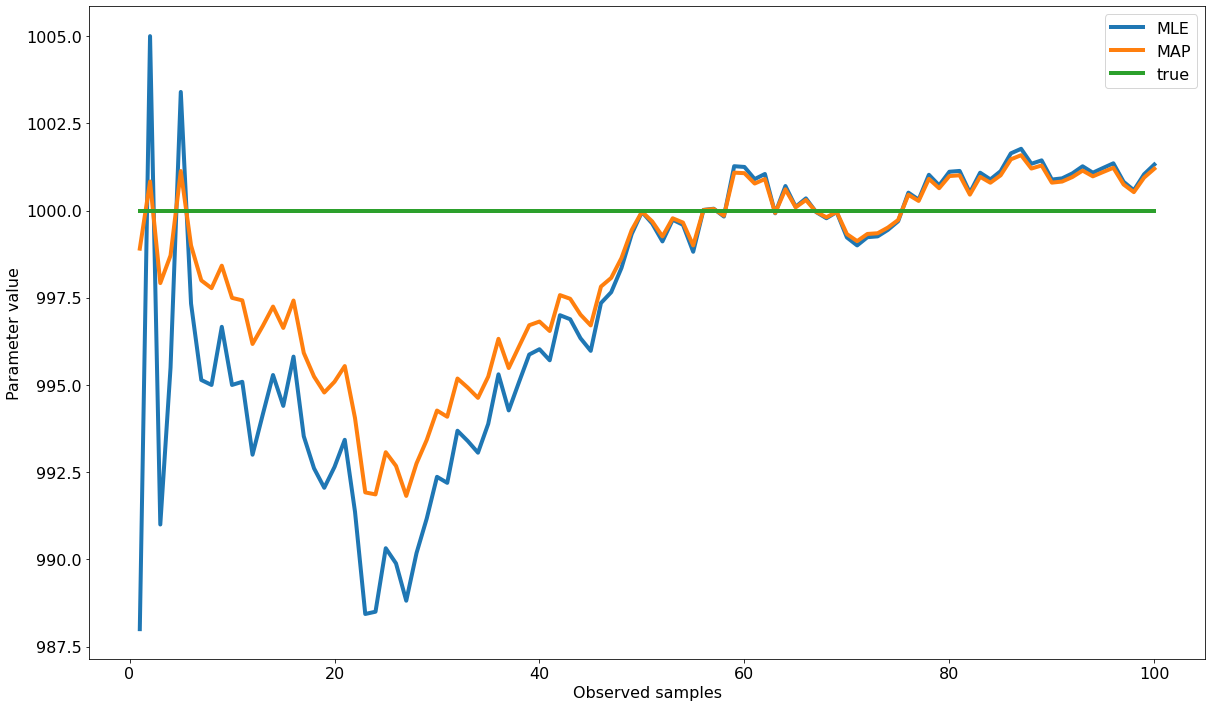

In [6]:
np.random.seed(42)

mu = 1000
sigma = 10

n_samples = 100
true_lambda = 1000

Z = np.random.poisson(lam = true_lambda, size=n_samples)
X = range(1, n_samples + 1)

mle_lambda = [np.mean(Z[:k]) for k in X]
map_lambda = [get_map(Z[:k]) for k in range(1, n_samples + 1)]

plt.plot(range(1, n_samples + 1), mle_lambda, label='MLE')
plt.plot(range(1, n_samples + 1), map_lambda, label='MAP')
plt.plot(X, np.ones(len(X)) * true_lambda, label='true')
plt.xlabel('Observed samples')
plt.ylabel('Parameter value')
plt.legend()
plt.show()

$\textbf{Q}$: As we can see, the MAP result is at least as close to the true value as MLE result. Is MAP estimator unbiased or not?

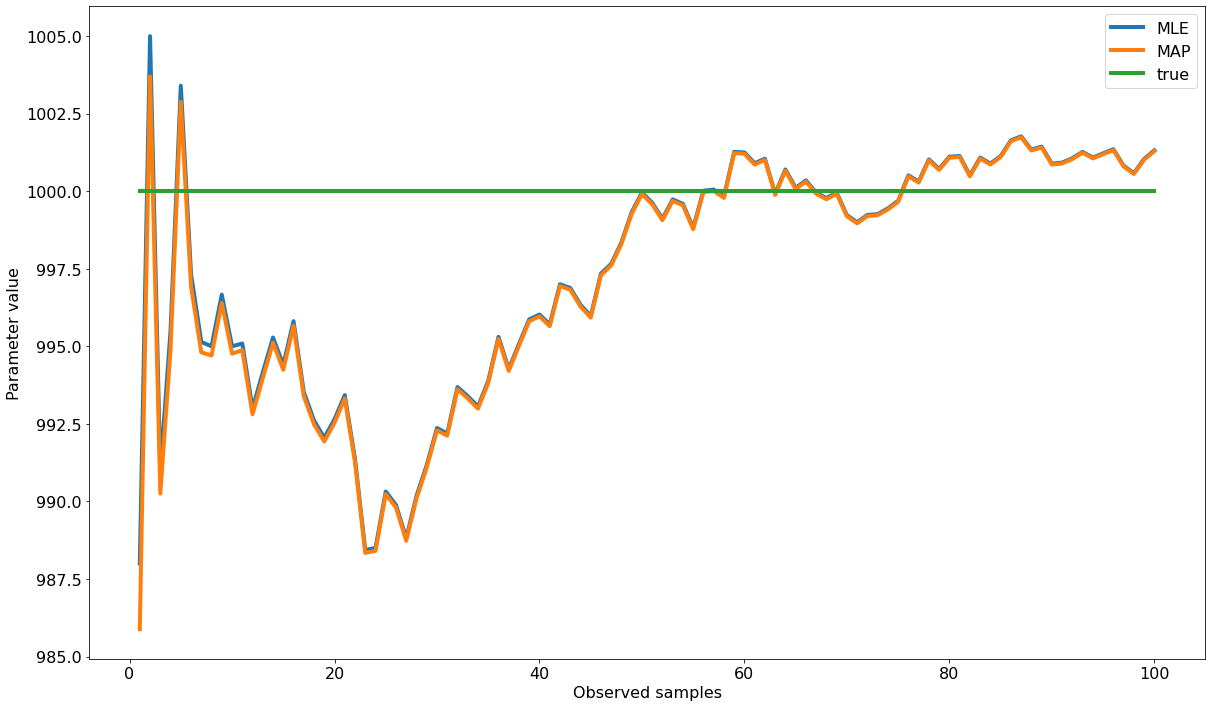

In [14]:
np.random.seed(42)

mu = 900
sigma = 200

n_samples = 100
true_lambda = 1000

Z = np.random.poisson(lam = true_lambda, size=n_samples)
X = range(1, n_samples + 1)

mle_lambda = [np.mean(Z[:k]) for k in X]
map_lambda = [get_map(Z[:k]) for k in range(1, n_samples + 1)]

plt.plot(range(1, n_samples + 1), mle_lambda, label='MLE')
plt.plot(range(1, n_samples + 1), map_lambda, label='MAP')
plt.plot(X, np.ones(len(X)) * true_lambda, label='true')
plt.xlabel('Observed samples')
plt.ylabel('Parameter value')
plt.legend()
plt.show()

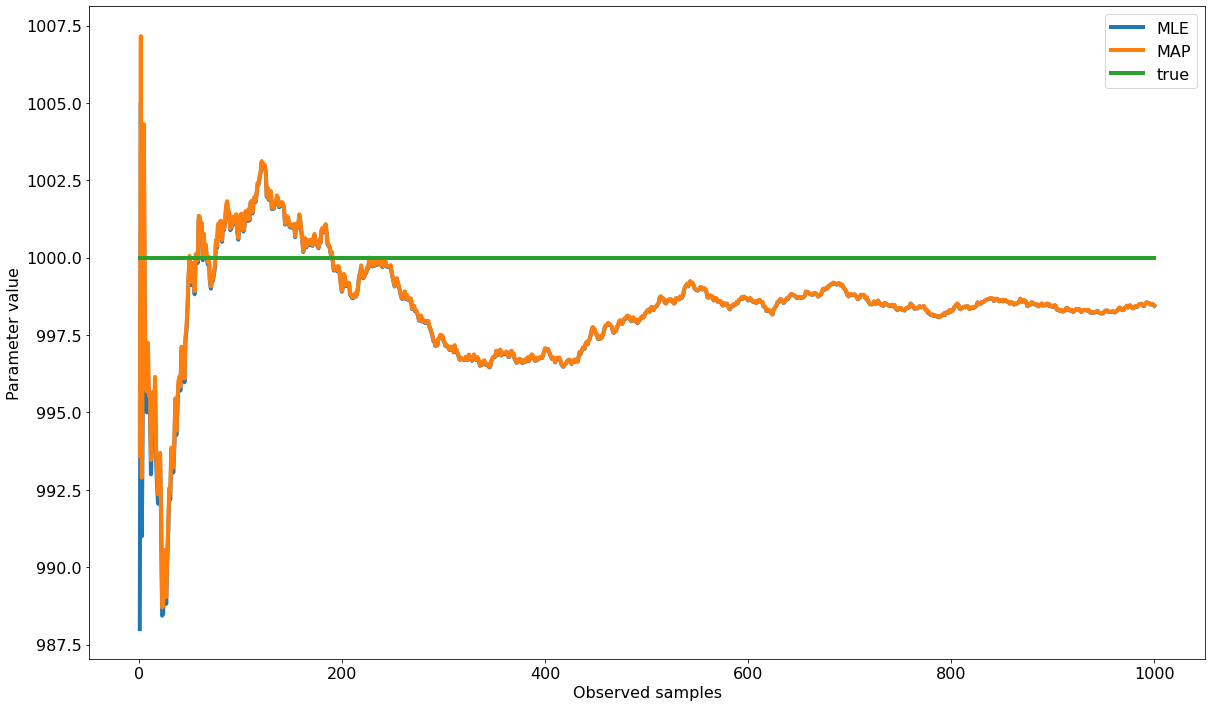

In [17]:
np.random.seed(42)

mu = 1050
sigma = 100

n_samples = 1000
true_lambda = 1000

Z = np.random.poisson(lam = true_lambda, size=n_samples)
X = range(1, n_samples + 1)

mle_lambda = [np.mean(Z[:k]) for k in X]
map_lambda = [get_map(Z[:k]) for k in range(1, n_samples + 1)]

plt.plot(range(1, n_samples + 1), mle_lambda, label='MLE')
plt.plot(range(1, n_samples + 1), map_lambda, label='MAP')
plt.plot(X, np.ones(len(X)) * true_lambda, label='true')
plt.xlabel('Observed samples')
plt.ylabel('Parameter value')
plt.legend()
plt.show()

In [18]:
np.linalg.norm(np.array(mle_lambda) - true_lambda), np.linalg.norm(np.array(map_lambda) - true_lambda)

(73.5773329937954, 71.73800943209326)

$\textbf{Q}$: Can we encode any assumption we want to find MAP?

## Risk functions

Let's create a loss function for this problem.

$\textbf{Q}$: should it be symmetric or not?

$$
\mathrm{L}(\lambda, f(Z)) = \begin{cases}
    0 & f(Z) = \lambda \\
    1 & f(Z) > \lambda \\
    M & f(Z) < \lambda
\end{cases}
$$

$M$ is a parameter which is much larger than $1$ (e.g., $1000$). 

The risk function:

$$
\mathrm{R}(f, Z) = 1\cdot P(f(Z) > \lambda) + M \cdot P(f(Z) < \lambda)
$$

This is hard to evaluate, and various techniques how to estimate intractable probabilities would be observed on PAI course.

Interesting and relatively simple way how to solve this problem is to apply CLT, and try to estimate the distribution of our estimator $f(Z)$. However, that's out of scope of the course, so let's continue with a simpler problem

## Vanilla risk functions [HW 6, 2019]


Some risk functions we can optimize quite well. Let's continue with asymmetric loss functions in a more vanilla example. 

We have a classifier that tests for cancer. Given a patient $x$, it gives us a probability $p = f(x)$ that the patient has cancer. The cost function, is obviously asymmetric: if we diagnose cancer for healthy patients, they will be observed further, and this error will be fixed. Otherwise, they may ignore cancer for longer time. Thus,

$$
\mathrm{L}(y, pred) = \begin{cases}
    1 & y = 0, pred = 1 \\
    M & y = 1, pred = 0
\end{cases}
$$,

and $R(f) = M \cdot f(x) \mathbb{1}[pred=0] + 1 \cdot (1 - f(x)) \mathbb{1}[pred=1]$

$\textbf{Q}$: So when do we want to predict cancer ($pred = 1$)?

When $M \cdot f(x) > 1 \cdot (1 - f(x))$, i.e., $f(x) > \frac{1}{M+1}$. So, if $M$ is high (say, $1000$), we have a very low threshold, and probably will have a lot of false positives as well, but we will still "win" in terms of risk (but not accuracy, f1, precision and so on). Oppositely, if we have $M = 1$ (risk is symmetric), we will have a balanced decision boundary



<!-- So $R(f) = 1 \cdot P[y = 0, p(x) > p^\ast] + M \cdot P[y = 1, p(x) \leq p^\ast] = P[y = 0 | x]$

$\textbf{Q}$: What if we have $L_1$ loss function? 

On [stackexchange](https://stats.stackexchange.com/questions/376867/proof-that-posterior-median-is-the-bayes-estimate-of-absolute-loss) there is a short math proof. Less rigorous proof:

$$ \frac{\partial}{f(Z)} \sum_{i = 1}^n |\lambda - f(Z)| = \sum_{f(Z) < \lambda} -1 + \sum_{f(Z) > \lambda} 1 = 0$$

So the equality will be achieved when $f(Z)$ is a median. Non-rigorous part is considering sum instead of expectation -->

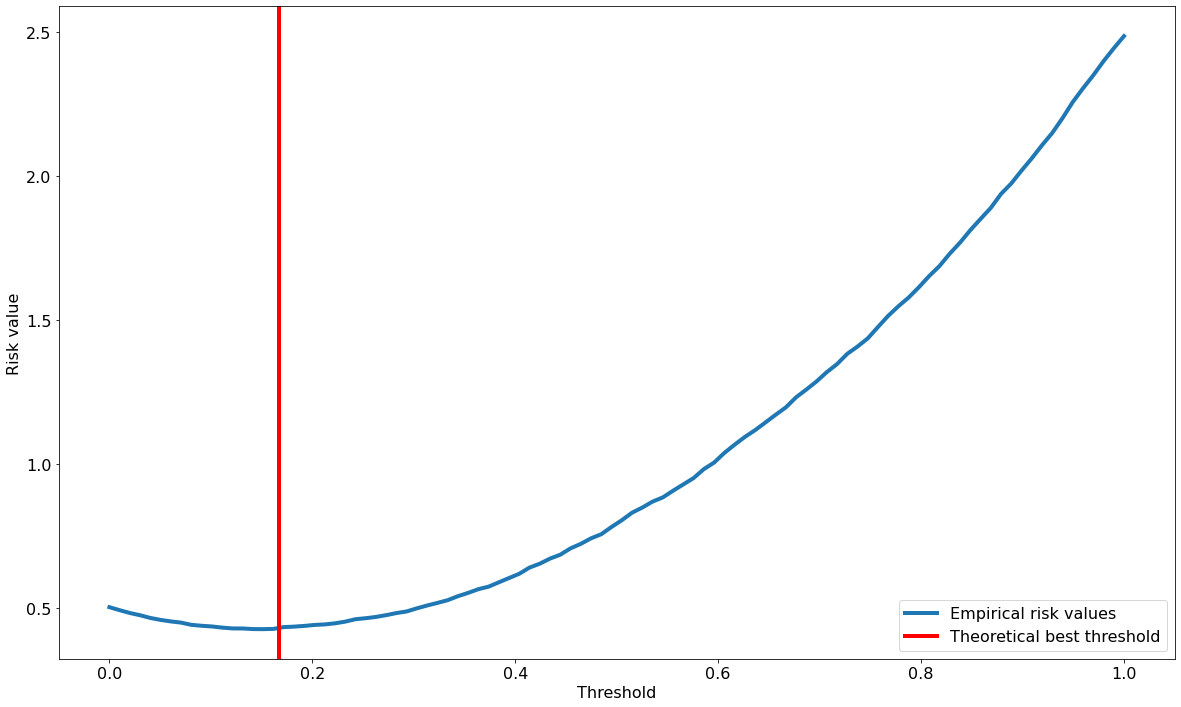

In [19]:
from sklearn.metrics import accuracy_score, f1_score
n_samples = 10000

X = np.random.uniform(0, 1, size=n_samples)
y_true = np.random.binomial(1, X)

M = 5
risk_f = lambda x, y: 1 if x == 0 and y == 1 else M if x == 1 and y == 0 else 0

thresholds = np.linspace(0, 1, 100)

risk_values = []
accuracy_values = []
f1_values = []

for t in thresholds:
    y_pred = (X >= t)
    r = np.mean([risk_f(y, y_pred) for y, y_pred in zip(y_true, y_pred)])
    risk_values.append(r)
    accuracy_values.append(accuracy_score(y_true, y_pred))
    f1_values.append(f1_score(y_true, y_pred))
    

plt.plot(thresholds, risk_values, label='Empirical risk values')
plt.axvline(x=1/(M+1), label = 'Theoretical best threshold', c='r')
plt.xlabel('Threshold')
plt.ylabel('Risk value')
plt.legend()
plt.show()

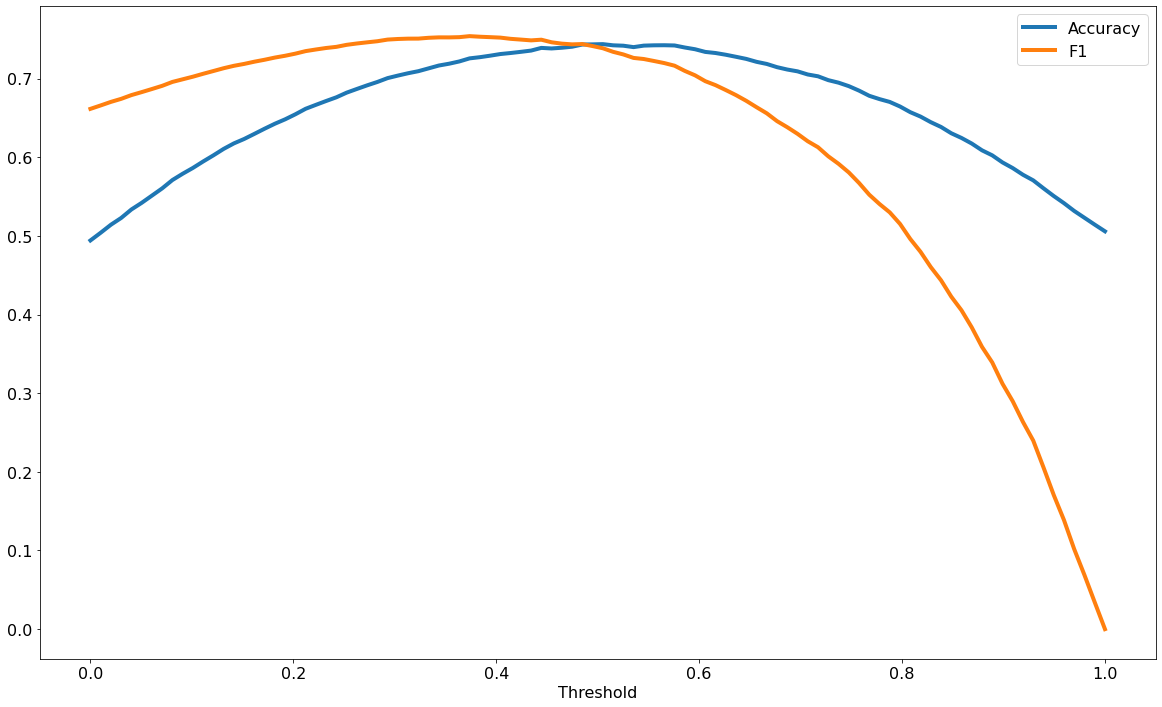

In [11]:
plt.plot(thresholds, accuracy_values, label='Accuracy')
plt.plot(thresholds, f1_values, label='F1')
plt.xlabel('Threshold')
plt.legend()
plt.show()